In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./datasets/sportsref.xlsx')
data.head()

,Year,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
0,2023,29,155,02:38:00,02:36:00,9.0,5.81,9.26,75.8,3.92,10.2,4.29,0.64,0.15,13.9,13.9,4496419.0,29009.0,4.567792e+09,157510076.0
1,2022,30,2430,03:06:00,03:03:00,216.0,8.89,8.57,74.9,3.89,10.3,4.30,0.67,0.18,26.1,32.4,64556658.0,26566.0,3.999597e+09,133319897.0
2,2021,30,2429,03:11:00,03:10:00,216.0,8.89,9.06,74.8,3.91,10.3,4.43,1.22,0.13,26.5,34.4,45304109.0,18651.0,3.616338e+09,120544596.0
3,2020,30,898,03:06:00,03:07:00,68.0,7.57,9.29,74.0,3.97,10.4,4.43,0.65,0.23,20.7,25.7,NaN,NaN,NaN,NaN
4,2019,30,2429,03:10:00,03:05:00,208.0,8.56,9.66,76.8,3.93,10.3,4.41,1.18,0.14,24.9,31.0,68506896.0,28203.0,3.981487e+09,132716223.0


In [3]:
data60s = data.loc[data['Year']>=1960, ['Year', 'Time/9I']]

In [4]:
data60s['Time_in_min'] = data60s['Time/9I'].apply(lambda t: t.hour * 60 + t.minute)

In [5]:
data60s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         64 non-null     int64 
 1   Time/9I      64 non-null     object
 2   Time_in_min  64 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


## Matplotlib method

In [29]:
import matplotlib.pyplot as plt
import datetime

px = 1 / plt.rcParams['figure.dpi']

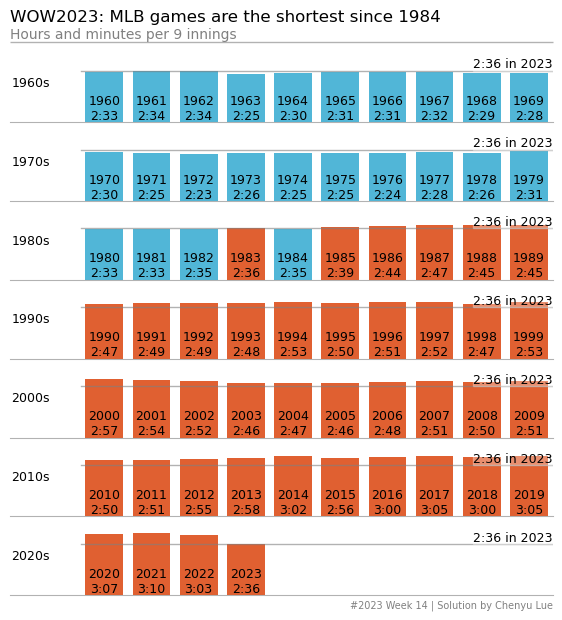

In [71]:
colors = ['#51B6D7', '#E06031']
data2023 = data60s.query('Year==2023')
years = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
data60s['Color'] = np.where(data60s['Time_in_min']<data2023.iloc[0, 2], colors[0], colors[1])

fig, axs = plt.subplots(7, 1, figsize=(700*px, 700*px), sharex=True, sharey=True)

for i, year in enumerate(years):
    cur_data = data60s.query(f'{year} <= Year < {year+10}')
    
    bars = axs[i].bar(np.arange(len(cur_data), 0, -1), cur_data['Time_in_min'], color=cur_data['Color'])
    axs[i].axhline(y=data2023.iloc[0, 2], xmin=0.13, color='gray', alpha=0.6, linewidth=1)
    
    axs[i].set_xlim(-1, 10.5)
    axs[i].set_ylabel(f"{year}s", fontsize=9, rotation=0, labelpad=-15)

    for row, patch in zip(cur_data.itertuples(), bars.patches):
        axs[i].annotate(f"{row[1]}\n{row[2].strftime('%H:%M')[1:]}", (patch.xy[0]+patch._width/2, patch.xy[1]),
                        va='bottom', ha='center', fontweight='ultralight', fontsize=9)
    
    axs[i].annotate(f"{data2023.iloc[0, 1].strftime('%H:%M')[1:]} in {data2023.iloc[0, 0]}", (1, data2023.iloc[0, 2]),
                    va='bottom', ha='right', fontweight='ultralight', fontsize=9, 
                    bbox=dict(facecolor='white', edgecolor='white', alpha=0.3, boxstyle='square,pad=0'),
                    xycoords=axs[i].get_yaxis_transform())

    axs[i].spines[['left', 'top', 'right']].set_visible(False)
    axs[i].spines['bottom'].set_color('gray')
    axs[i].spines['bottom'].set_alpha(0.6)
    axs[i].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

# Add title description
offset = 10 # in points
offset_px = fig.canvas.get_renderer().points_to_pixels(offset)
axs[0].hlines(y=1, xmin=0, xmax=1, transform=axs[0].transAxes, clip_on=False,
              color='gray', alpha=0.6, linewidth=1, offsets=(0, offset_px)
             )

offset += 1
axs[0].annotate('Hours and minutes per 9 innings', (0, 1), xytext=(0, offset),
                xycoords='axes fraction', textcoords='offset points', fontsize=10, color='gray',
                va='bottom', ha='left')
offset += 12
axs[0].annotate('WOW2023: MLB games are the shortest since 1984', (0, 1), xytext=(0, offset),
                xycoords='axes fraction', textcoords='offset points', fontsize=12, 
                va='bottom', ha='left')

# Add footnotes
axs[-1].annotate('#2023 Week 14 | Solution by Chenyu Lue', (1, 0), xytext=(0, -3),
                 xycoords='axes fraction', textcoords='offset points', fontsize=7, color='gray',
                 va='top', ha='right')

fig.savefig("2023w14.png", bbox_inches="tight", dpi=300)